# Real Estate EDA and Initial Setup
This notebook performs exploratory data analysis (EDA) and prepares the dataset used for the Streamlit real estate price estimator app.

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# 2. Load Dataset
df = pd.read_csv("cleaned_df.csv")

In [3]:
# 3. Clean and Prepare
df = df.dropna(subset=['ListedPrice', 'Bedroom', 'Bathroom', 'Area', 'State'])
df = df.query("ListedPrice <= 2500000 and Area <= 7500")
df['Bedroom'] = df['Bedroom'].astype(int)
df = df[df['Bedroom'] > 0]
df['BedroomsGroupedNum'] = df['Bedroom'].apply(lambda x: x if x < 6 else 6)

In [4]:
# 4. Initial Exploration
display(df.head())
display(df.describe())
df.info()
df['State'].value_counts()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,BedroomsGroupedNum
0,AL,Saraland,Scott Dr,36571.0,4,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,4
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,3
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,2
3,AL,Chelsea,Mallet Way,35043.0,3,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,3
4,AL,Huntsville,Turtlebrook Ct,35811.0,3,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,3


,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,BedroomsGroupedNum
count,22210.000000,22210.000000,22210.000000,22210.000000,22210.000000,21324.000000,1.518500e+04,16402.000000,22210.000000,22210.000000,2.221000e+04,22210.000000
mean,49956.864836,3.358082,2.352654,2015.131742,208.274121,1.879528,4.069535e+05,2357.468479,39.739150,-92.220036,4.063696e+05,3.348942
std,29479.635826,0.961672,0.941880,903.377736,130.829641,10.058500,2.924532e+05,1212.396464,5.702573,16.809253,2.997544e+05,0.920392
min,1002.000000,1.000000,0.000000,120.000000,1.925926,0.000000,1.570000e+04,100.000000,25.449816,-161.772780,4.888000e+03,1.000000
25%,25427.000000,3.000000,2.000000,1398.000000,132.038865,0.172176,2.297000e+05,1625.000000,35.912104,-103.207075,2.250000e+05,3.000000
50%,50414.500000,3.000000,2.000000,1833.000000,182.437168,0.290000,3.388000e+05,2127.000000,39.920238,-89.098197,3.399000e+05,3.000000
75%,74066.000000,4.000000,3.000000,2424.000000,252.346000,0.900000,4.915000e+05,2795.000000,42.912859,-79.183985,4.950000e+05,4.000000
max,99950.000000,16.000000,13.000000,7500.000000,2363.095238,644.200000,2.571700e+06,38522.000000,64.949490,-67.016030,2.500000e+06,6.000000


<class 'pandas.core.frame.DataFrame'>
Index: 22210 entries, 0 to 22680
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               22210 non-null  object 
 1   City                22210 non-null  object 
 2   Street              22210 non-null  object 
 3   Zipcode             22210 non-null  float64
 4   Bedroom             22210 non-null  int64  
 5   Bathroom            22210 non-null  float64
 6   Area                22210 non-null  float64
 7   PPSq                22210 non-null  float64
 8   LotArea             21324 non-null  float64
 9   MarketEstimate      15185 non-null  float64
 10  RentEstimate        16402 non-null  float64
 11  Latitude            22210 non-null  float64
 12  Longitude           22210 non-null  float64
 13  ListedPrice         22210 non-null  float64
 14  BedroomsGroupedNum  22210 non-null  int64  
dtypes: float64(10), int64(2), object(3)
memory usage: 2.7+ MB


State
IN    492
VA    490
MO    486
MI    486
AZ    483
AK    482
IA    482
FL    482
CT    482
TX    482
PA    480
AR    479
NH    479
ND    478
MA    477
AL    475
MS    473
MD    471
ID    471
OH    471
ME    470
IL    468
KS    467
NE    465
KY    465
RI    463
OK    460
WI    460
CO    459
NM    456
GA    454
CA    451
SD    446
VT    444
UT    444
SC    444
LA    442
WA    433
WV    429
DE    424
NV    422
WY    421
MN    420
NC    419
OR    416
MT    385
TN    379
NY    373
NJ    330
Name: count, dtype: int64

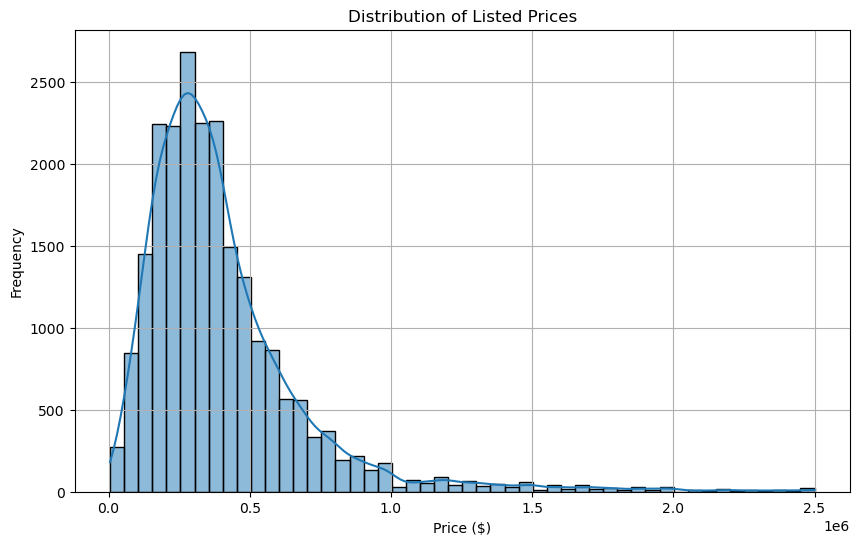

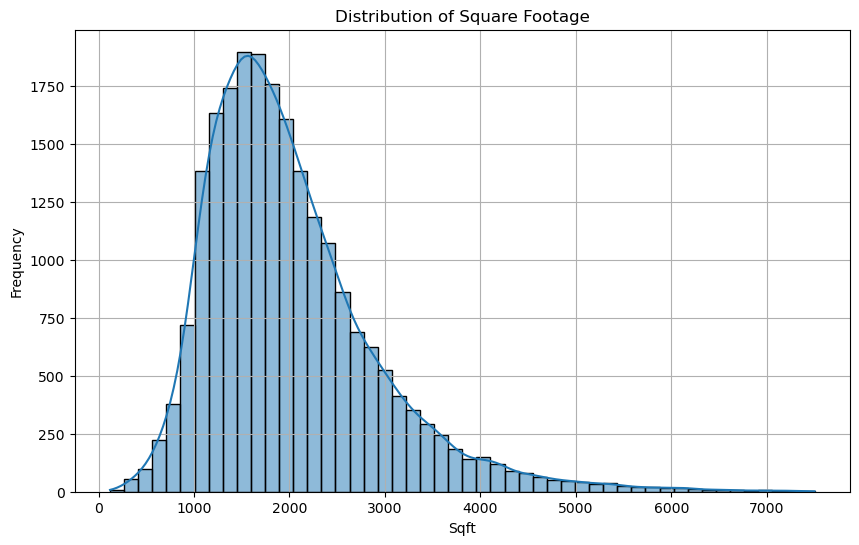

In [5]:
# 5. Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['ListedPrice'], bins=50, kde=True)
plt.title("Distribution of Listed Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], bins=50, kde=True)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

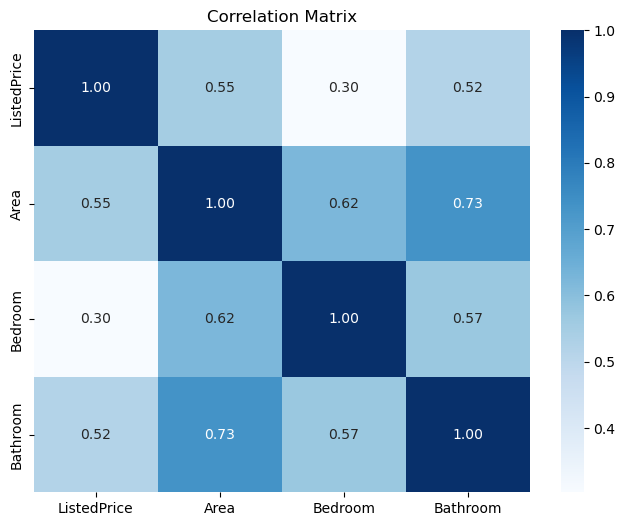

In [6]:
# 6. Correlation Heatmap
numeric_cols = ['ListedPrice', 'Area', 'Bedroom', 'Bathroom']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# 7. Price vs. Square Footage by Bedrooms (Interactive)
fig = px.scatter(
    df,
    x='Area',
    y='ListedPrice',
    color='BedroomsGroupedNum',
    labels={'Area': 'Square Footage', 'ListedPrice': 'Price ($)', 'BedroomsGroupedNum': 'Bedrooms'},
    title="Price vs Square Footage",
    hover_data=['Bedroom', 'Bathroom', 'State']
)
fig.show()

In [8]:
# 8. Box Plot: Price by Bedrooms
fig2 = px.box(
    df,
    x="BedroomsGroupedNum",
    y="ListedPrice",
    points="outliers",
    color="BedroomsGroupedNum",
    labels={"BedroomsGroupedNum": "Bedrooms", "ListedPrice": "Price ($)"},
    title="Listed Prices by Number of Bedrooms"
)
fig2.update_layout(showlegend=False)
fig2.show()

## Notes
- The data was filtered to remove extreme outliers and missing values.
- Bedrooms were grouped into 6+ to simplify plots.
- You can build a model using Bedroom, Bathroom, Area, and State as features for price prediction.


In [11]:
df['Bathroom'].value_counts()

Bathroom
2.00     10577
3.00      6042
1.00      3223
4.00      1648
5.00       390
6.00        98
0.00        60
2.50        53
3.50        26
7.00        24
2.10        12
1.50        11
4.50        11
1.75        10
8.00         6
1.10         6
2.20         2
3.10         2
2.75         1
13.00        1
0.75         1
2.25         1
9.00         1
4.10         1
1.20         1
11.00        1
10.00        1
Name: count, dtype: int64